In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from mpl_toolkits.basemap import Basemap # need to install basemap and geos 
from allskymap import AllSkyMap # need to install pyproj

%matplotlib inline

## Sky Coverage

In [2]:
latTimau = -9.6 # latitude of Timau in degree
elevMin = 15.0 # minimum elevation of telescope

In [3]:
decMaxN = 90.0 - (elevMin - latTimau)
decMaxS = -90.0 + (elevMin + latTimau)
print decMaxN, decMaxS

65.4 -84.6


Integral in spherical coordinate to calculate fraction of the sky

$$\frac{\int_{0}^{2\pi} \int_{a}^{b} \sin{\theta} d \theta d \phi }{4 \pi}$$

In [4]:
coverage = 0.5*(-math.cos(math.radians(180.0 - (elevMin + latTimau)))+math.cos(math.radians((elevMin - latTimau))))
print "Sky coverage: ", coverage*100, '%'

Sky coverage:  95.2399036825 %


#### Equatorial coordinate

In [5]:
xedge = np.linspace(-180, 180, 100)
yedge = np.linspace(decMaxS, decMaxN, 100)
X, Y = np.meshgrid(xedge, yedge)

In [6]:
colo = np.zeros((100, 100)) + 0.2 # sakwerno
from matplotlib.colors import ListedColormap
WhGrYlBu = ListedColormap(['#b7f6ff', '#70edff', '#29e4ff', '#00e1fb', '#0fffc6', '#3bffa4', '#68ff82', '#94ff60', '#c0ff3e', '#edff1c', '#fff400', '#ffc700', '#ff9b00', '#ff6e00', '#ff4200', '#ff1500', '#e80000', '#bb0000', '#8f0000'])
#.from_list('WhGrYlBu', ['white', 'cyan', 'lightblue', 'lightgreen', 'green', 'yellow', 'orange', 'red', 'red'])

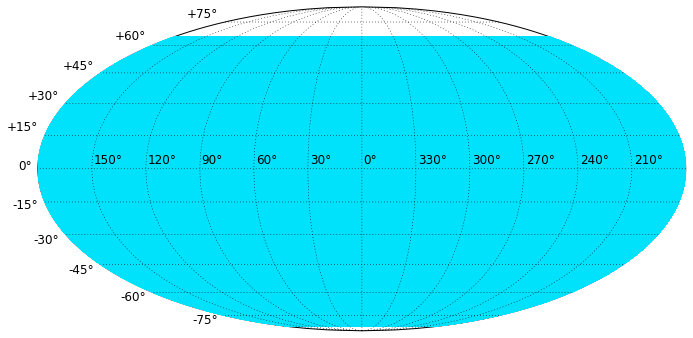

In [7]:
fig = plt.figure(figsize=(12,6))
main_ax = plt.axes([0.05, .19, .9, .75])  # rect=L,B,W,H

# Set up the projection and draw a grid.
m = AllSkyMap(ax=main_ax, projection='moll')
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(-75,76,15), linewidth=0.5, dashes=[1,2],labels=[1,0,0,0], fontsize=12)
m.drawmeridians(np.arange(-150,151,30), linewidth=0.5, dashes=[1,2])

m.pcolormesh(X, Y, colo, vmin=0., vmax=1., cmap=WhGrYlBu, latlon=True)#, alpha=0.5)

# Label a subset of meridians.
lons = np.arange(-150,151,30)
m.label_meridians(lons, fontsize=12, vnudge=1, halign='left', hnudge=-1)  # nudge<0 shifts to right


plt.show()

### Overlay with allsky catalogue
- Yale Bright Star Catalog (V < 8)

In [8]:
filename = 'bsc5.dat'
ra = []
dec = []
l = []
b = []
mag = []
with open(filename, 'r') as ifile:
    for dataline in ifile:
        if dataline[102:107].strip():
            ra.append(dataline[75:77] + 'h' + dataline[77:79] + 'm' +  dataline[79:83] + 's') #hms
            dec.append(dataline[83:86] + 'd' + dataline[86:88] + 'm' + dataline[88:90] + 's') #dms
            l.append(dataline[90:96]) # degree
            b.append(dataline[96:102]) # degree
            mag.append(float(dataline[102:107]))     

ra = np.array(ra)
dec = np.array(dec)
l = np.array(l)
b = np.array(b)
mag = np.array(mag)

In [9]:
mag[mag<0.0]

array([-0.72, -1.46, -0.04, -0.01])

In [10]:
mag.max()

7.96

#### in equatorial coordinate

In [11]:
eq = SkyCoord(ra=ra, dec=dec, unit=(u.hourangle, u.deg), frame='fk5')

In [12]:
print len(eq.dec.value)
mask1 = eq.dec.value > decMaxS
deco = eq.dec.value[mask1]
print len(deco)
mask2 = deco < decMaxN
decoo = deco[mask2]
print "Number of stars :", len(decoo)

9096
9075
Number of stars : 8704


In [13]:
rao = eq.ra.value[mask1]
raoo = rao[mask2]

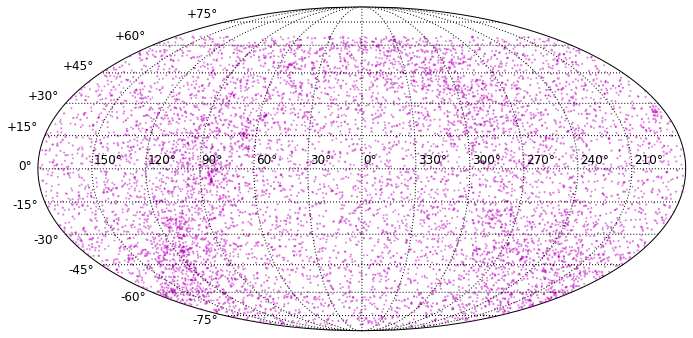

In [14]:
fig = plt.figure(figsize=(12,6))
main_ax = plt.axes([0.05, .19, .9, .75])  # rect=L,B,W,H

# Set up the projection and draw a grid.
m = AllSkyMap(ax=main_ax, projection='moll')
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(-75,76,15), linewidth=1, dashes=[1,2], labels=[1,0,0,0], fontsize=12)
m.drawmeridians(np.arange(-150,151,30), linewidth=1, dashes=[1,2])

x, y = m(raoo, decoo)
cr_pts = m.scatter(x, y, s=(mag.max()+2 - mag), c='m', marker='o', linewidths=0.5, edgecolors='none', alpha=0.5)

# Label a subset of meridians.
lons = np.arange(-150,151,30)
m.label_meridians(lons, fontsize=12, vnudge=1, halign='left', hnudge=-1)  # nudge<0 shifts to right

plt.show()

#### in galactic coordinate

In [15]:
gal = SkyCoord(l=l, b=b, unit=(u.deg, u.deg), frame='galactic')

In [16]:
lo = gal.l.value[mask1]
loo = lo[mask2]

bo = gal.b.value[mask1]
boo = bo[mask2]

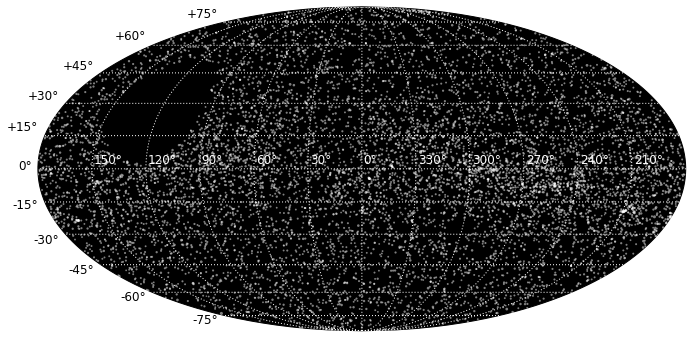

In [17]:
fig = plt.figure(figsize=(12,6))
main_ax = plt.axes([0.05, .19, .9, .75])  # rect=L,B,W,H

# Set up the projection and draw a grid.
m = AllSkyMap(ax=main_ax, projection='moll')
m.drawmapboundary(fill_color='black')

x, y = m(loo, boo)
cr_pts = m.scatter(x, y, s=(mag.max()+2 - mag), c='white', marker='o', linewidths=0.5, edgecolors='none', alpha=0.5)

m.drawparallels(np.arange(-75,76,15), color='white', linewidth=1, dashes=[1,2], labels=[1,0,0,0], fontsize=12)
m.drawmeridians(np.arange(-150,151,30), color='white', linewidth=1, dashes=[1,2])

# Label a subset of meridians.
lons = np.arange(-150,151,30)
m.label_meridians(lons, fontsize=12, vnudge=1, halign='left', hnudge=-1, color='white')  # nudge<0 shifts to right

plt.show()

#### in 3D

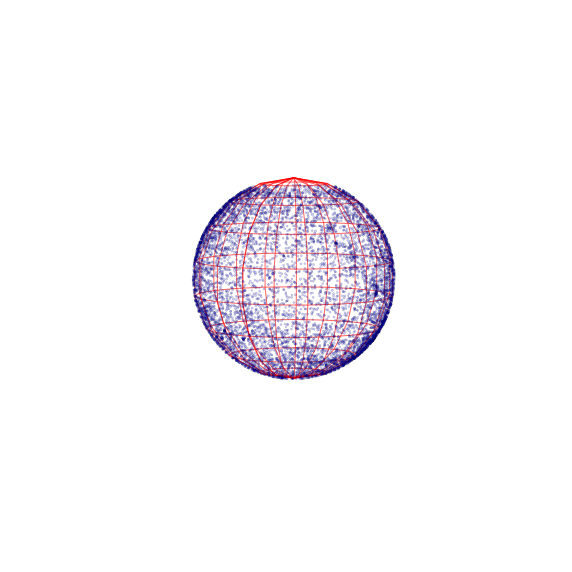

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.set_aspect("equal")

theta = np.radians(90.0 - decoo)
phi = np.radians(raoo)

xs = np.sin(theta)*np.cos(phi)
ys = np.sin(theta)*np.sin(phi)
zs = np.cos(theta)

ax.scatter(xs, ys, zs, s=(mag.max()+2 - mag), c='b', marker='o', linewidths=0.5, edgecolors='none', alpha=0.2)


u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax.plot_wireframe(x, y, z, color="r", alpha=0.6)

ax.set_axis_off()

ax.view_init(elev=5., azim=30)

plt.show()

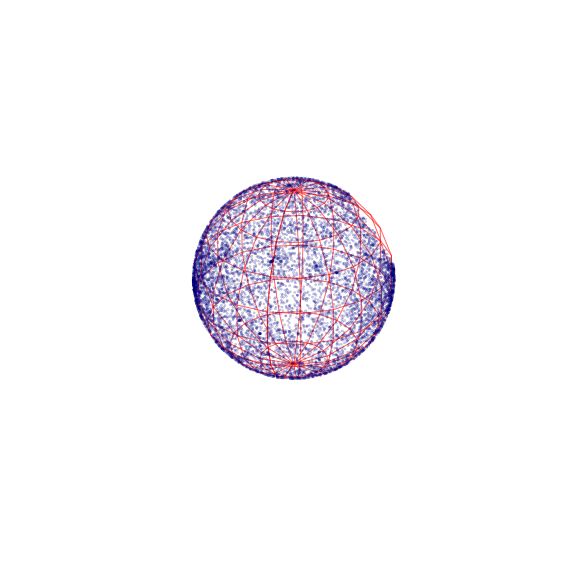

In [19]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.set_aspect("equal")

theta = np.radians(90.0 - boo)
phi = np.radians(loo)

xs = np.sin(theta)*np.cos(phi)
ys = np.sin(theta)*np.sin(phi)
zs = np.cos(theta)

ax.scatter(xs, ys, zs, s=(mag.max()+2 - mag), c='b', marker='o', linewidths=0.5, edgecolors='none', alpha=0.2)


u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax.plot_wireframe(x, y, z, color="r", alpha=0.6)

ax.set_axis_off()

ax.view_init(elev=30., azim=15)

plt.show()